## Multi-Class Sign Mnist. CNN with Image Generator and Augmentation and Reg Dropouts

Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%208%20-%20Multiclass%20with%20Signs/Exercise%208%20-%20Question.ipynb

Answers Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%208%20-%20Multiclass%20with%20Signs/Exercise%208%20-%20Answer.ipynb

Sign MNIST Dataset: https://www.kaggle.com/datamunge/sign-language-mnist/home



---



Keras Optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

Keras Image Preprocessing and Augmentation: https://keras.io/preprocessing/image/  (useful to use it with array labels (flow) or folders (flow_from_directory)

In [0]:
import csv
import numpy as np
import pandas as pd
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

TensorFlow 2.x selected.
2.1.0


The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign-language-mnist.zip to sign-language-mnist.zip


In [0]:
import os 

os.chdir('/content/')
print(os.getcwd())
print(os.listdir(os.getcwd()))
os.rename("/content/sign-language-mnist.zip", "/tmp/sign-language-mnist.zip")  # move the file from one folder to another
os.chdir('/tmp/')
print(os.getcwd())
print(os.listdir(os.getcwd()))


import zipfile

local_zip = '/tmp/sign-language-mnist.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
print(os.getcwd())
print(os.listdir(os.getcwd()))


/content
['.config', 'sign-language-mnist.zip', 'sample_data']
/tmp
['sign-language-mnist.zip']
/tmp
['american_sign_language.PNG', 'sign_mnist_test', 'amer_sign2.png', 'sign-language-mnist.zip', 'sign_mnist_test.csv', 'amer_sign3.png', 'sign_mnist_train', 'sign_mnist_train.csv']


In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    # with open(filename) as training_file:
    #   # Your code starts here
    #   training_file.readline()
    #   # Your code ends here
    
    ds = pd.read_csv(filename, header=0, sep=',', engine='python' )
    images = ds.iloc[:,1:]
    images = images.values
    # print(images.shape)
    images = images.reshape((images.shape[0],28,28))   # np.array_split
    # print(images.shape)

    labels = ds.iloc[:,0]
    labels = labels.values
    # print(labels.shape)


    # Alternative:
    # with open(filename) as training_file:
    # csv_reader = csv.reader(training_file, delimiter=',')
    # first_line = True
    # temp_images = []
    # temp_labels = []
    # for row in csv_reader:
    #     if first_line:
    #         # print("Ignoring first line")
    #         first_line = False
    #     else:
    #         temp_labels.append(row[0])
    #         image_data = row[1:785]
    #         image_data_as_array = np.array_split(image_data, 28)
    #         temp_images.append(image_data_as_array)
    # images = np.array(temp_images).astype('float')
    # labels = np.array(temp_labels).astype('float')

    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


[15402 10363   296 26924 15809 27321 18401 26663 18465 10123]


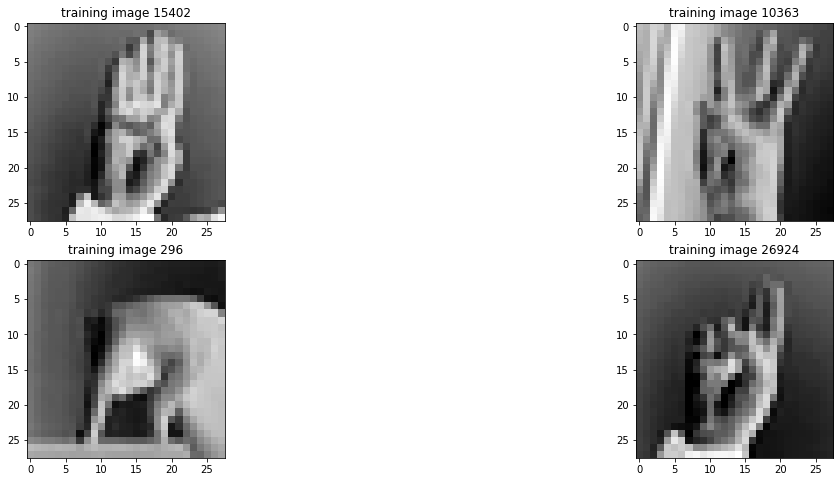

In [0]:
# Printing examples:
import matplotlib.pyplot as plt

idx = np.random.permutation( range(0,training_labels.shape[0]) )
print(idx[:10])

plt.figure(figsize=(20,8))
for i in range(0,4,1) :  # for i,img in enumarate(training_images) :
  plt.subplot(2,2,i+1)
  plt.imshow( training_images[idx[i],:,:], cmap='Greys', label='training image '+str(idx[i]) )
  plt.title('training image '+str(idx[i]))
plt.show()


In [0]:
y = np.expand_dims(training_images, axis=3)
print(y.shape)

y = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
print(y.shape)

(27455, 28, 28, 1)
(27455, 28, 28, 1)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)  # or np.expand_dims(training_images, axis=3)   # Your Code Here
testing_images = testing_images.reshape(testing_images.shape[0], testing_images.shape[1], testing_images.shape[2], 1)  # or np.expand_dims(testing_images, axis=3)   # Your Code Here

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)



# Converting training and testing labels to one-hot vectors for each sample:
# Note: this is needed if we use 'categorical_crossentropy'. If we use 'sparse_categorical_crossentropy', this is not needed!
from keras.utils import to_categorical

training_labels = to_categorical(training_labels)  # this is needed if we use 'categorical_crossentropy'. If we use 'sparse_categorical_crossentropy', this is not needed!
testing_labels = to_categorical(testing_labels)

print(training_labels.shape)
print(testing_labels.shape)



# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

val_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1/255
    )


# Since we have the data in arrays, we can't use flow_from_directory. We shall use flow instead.

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(training_images)
val_datagen.fit(testing_images)

train_generator = train_datagen.flow(training_images, training_labels, batch_size=32)
val_generator = val_datagen.flow(testing_images, testing_labels, batch_size=16)

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(27455, 25)
(7172, 25)


Using TensorFlow backend.


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D( 64, (5,5), activation='relu', input_shape=(training_images.shape[1], training_images.shape[2], training_images.shape[3]) ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D( 64, (5,5), activation='relu' ),
    # tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D( 128, (3,3), activation='relu' ),
    # tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()


# Compile Model. 
from tensorflow.keras.optimizers import RMSprop

model.compile(
    # Your Code Here
    optimizer=RMSprop(lr=0.0001),   # tf.train.AdamOptimizer()
    loss='categorical_crossentropy',  # you could use 'sparse_categorical_crossentropy'  and like this you don't have to convert the data labels using to_categorical above.
    metrics=['accuracy']
    )



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [0]:
# Callback to stop training:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}) :
    targ=0.99
    if logs['accuracy']>targ :
      print('Reached %0.1f%% training accurcy -> training stopped!' %(targ*100))
      self.model.stop_training=True
      
callback = myCallback()


# Train the Model
history = model.fit_generator(
    # Your Code Here
    train_generator,  # train_datagen.flow(training_images, training_labels, batch_size=32)
    steps_per_epoch= train_generator.n//train_generator.batch_size,  # len(training_images) / 32, 
    epochs=50,
    callbacks=[callback],
    validation_data = val_generator,  # test_datagen.flow(testing_images, testing_labels, batch_size=32)
    validation_steps = val_generator.n//val_generator.batch_size,  # len(testing_images) / 32,
    verbose=1
    )

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857 steps, validate for 448 steps
Epoch 1/50
857/857 [==============================] - 21s 24ms/step - loss: 2.9361 - accuracy: 0.1119 - val_loss: 2.3463 - val_accuracy: 0.2556
Epoch 2/50
857/857 [==============================] - 14s 16ms/step - loss: 2.4837 - accuracy: 0.2232 - val_loss: 1.8504 - val_accuracy: 0.4293
Epoch 3/50
857/857 [==============================] - 13s 16ms/step - loss: 2.1280 - accuracy: 0.3106 - val_loss: 1.6454 - val_accuracy: 0.4223
Epoch 4/50
857/857 [==============================] - 13s 16ms/step - loss: 1.8390 - accuracy: 0.3977 - val_loss: 1.5462 - val_accuracy: 0.4648
Epoch 5/50
857/857 [==============================] - 14s 16ms/step - loss: 1.5921 - accuracy: 0.4672 - val_loss: 1.2735 - val_accuracy: 0.5424
Epoch 6/50
857/857 [==============================] - 14s 16ms/step - loss: 1.3864 - accuracy: 0.5376 - val_lo

[6.92426086682151, 0.56609035]

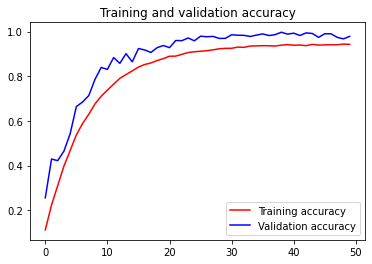

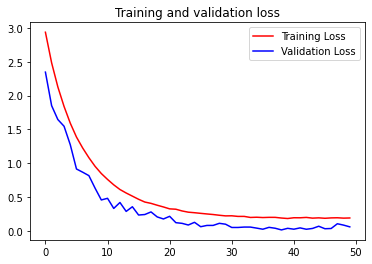

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()